# Introduction
This project analyzes a dataset containing chocolate sales transactions, focusing on estimating demand and determining optimal pricing strategies. The main objectives are:

- Cleaning and exploring chocolate sales data.
- Visualizing sales patterns and price relationships.
- Estimating a linear demand model for different chocolate products.
- Calculating optimal prices and quantities to maximize revenue.

In [11]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [17]:
# Load and clean dataset
sales_data = pd.read_csv(r"C:\Users\sebas\Dropbox\Data projects portfolio\Data Analysis\Optimal pricing and demand forcasting for chocolate\Data\Sales.csv")
sales_data.head(), sales_data.info()

# Clean data
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%b-%y')
sales_data['Amount'] = sales_data['Amount'].replace('[\$,]', '', regex=True).astype(float)
sales_data['Price_per_Box'] = sales_data['Amount'] / sales_data['Boxes Shipped']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\sebas\AppData\Local\Temp\ipykernel_21544\3595207160.py:7: SyntaxWarning: invalid escape sequence '\$'
  sales_data['Amount'] = sales_data['Amount'].replace('[\$,]', '', regex=True).astype(float)


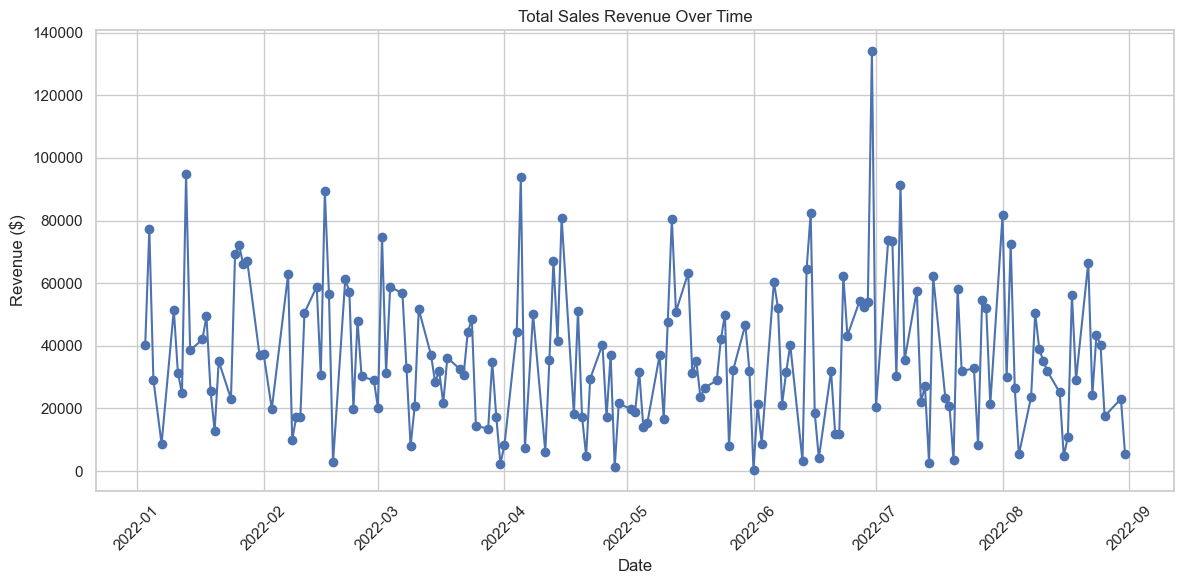

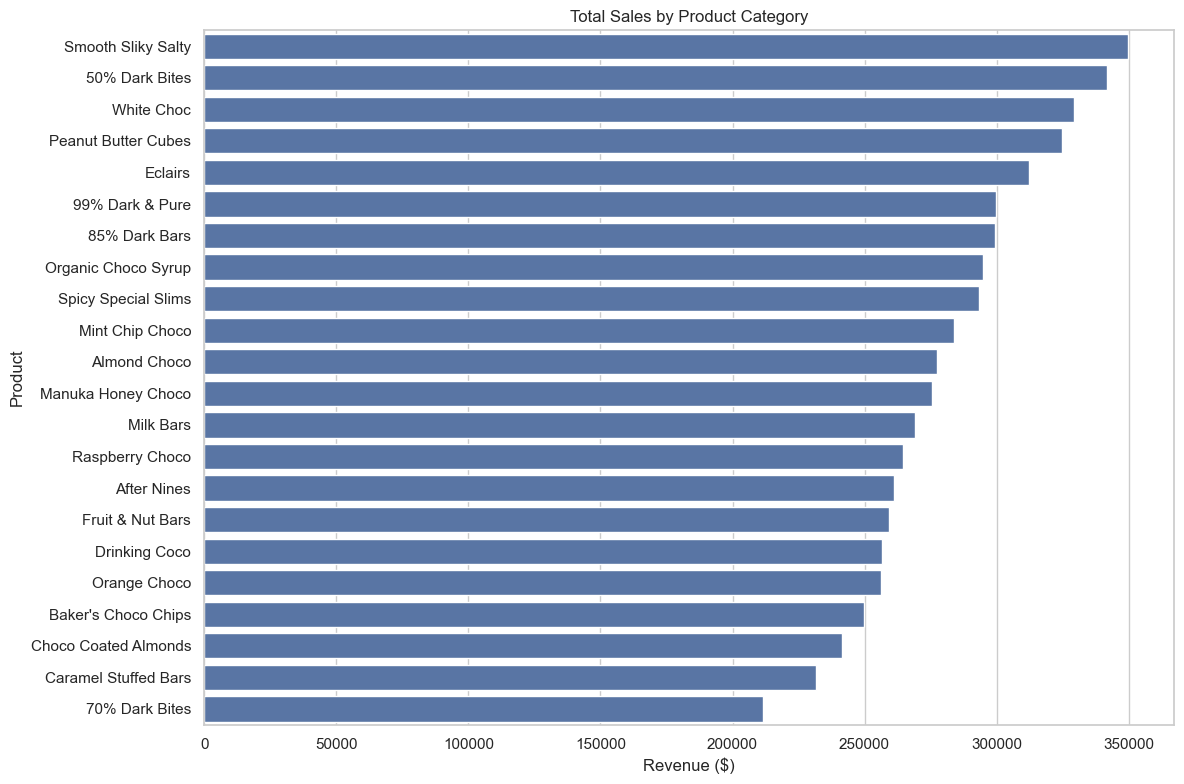

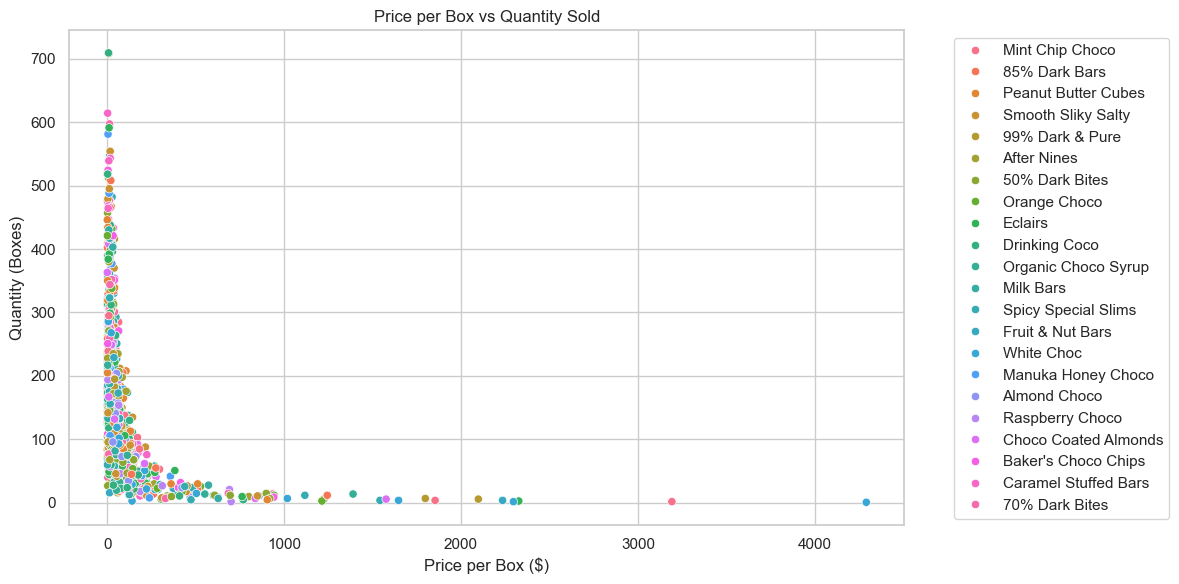

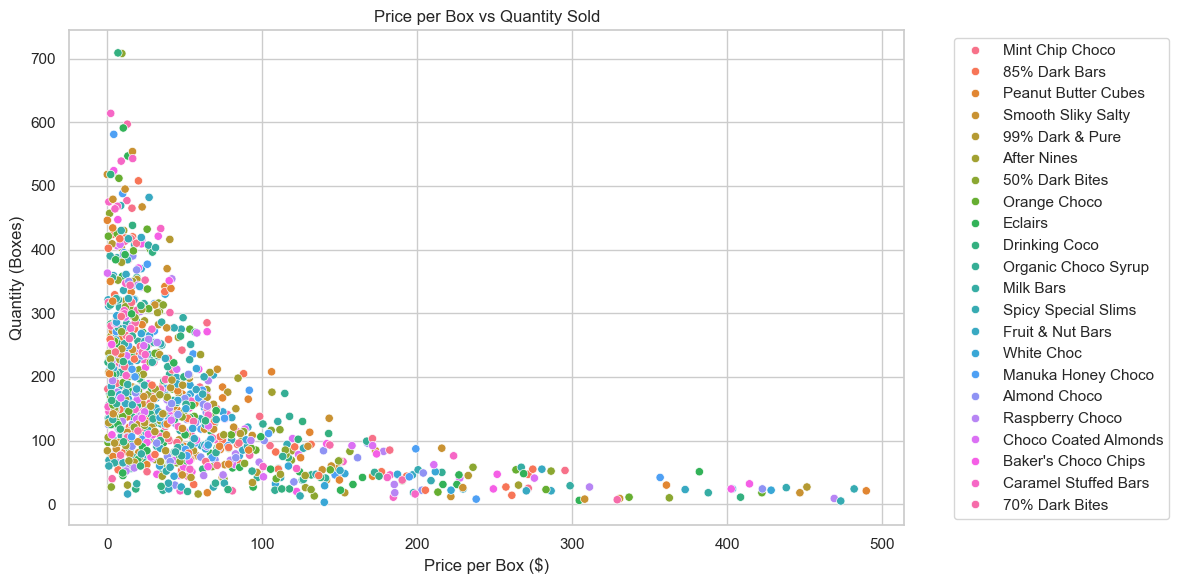

In [21]:
## Visualizations
sns.set(style='whitegrid')

# Total Sales Over Time
sales_over_time = sales_data.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time['Date'], sales_over_time['Amount'], marker='o')
plt.title('Total Sales Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sales by Product
sales_by_product = sales_data.groupby('Product')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=sales_by_product.index, x=sales_by_product.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Revenue ($)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

# Price per Box vs Quantity Sold
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data, x='Price_per_Box', y='Boxes Shipped', hue='Product')
plt.title('Price per Box vs Quantity Sold')
plt.xlabel('Price per Box ($)')
plt.ylabel('Quantity (Boxes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Price per Box vs. quantity dropping outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_data[(sales_data["Price_per_Box"]<500)], x='Price_per_Box', y='Boxes Shipped', hue='Product')
plt.title('Price per Box vs Quantity Sold')
plt.xlabel('Price per Box ($)')
plt.ylabel('Quantity (Boxes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Demand Estimation and Optimal Pricing
We want to estimate demand for each product $j$ in the data. Assume that demand is linear, then we can write demand for each product $j$ as
$$q_j = a + bp_j,$$
where $q_j$ is quantity sold for product $j$ and $p_j$ is the corresponding price for product $j.$ We can estimate the demand function using a linear regression model. In particular, we can estimate 
$$q_{ij} = \alpha + \beta p_{ij} + \epsilon_{ij}.$$
Lastly, the optimal price can be found by maximizing the revenue, that is,
$$\max_{p_j} p_j\times q_j =p_j(a+bp_j).$$
Solving this optimization problem, we obtain the optimal price 
$$p^*=\frac{a}{2b}.$$
Now let us implement this in Python.

In [27]:
# Demand estimation and optimal pricing
products = sales_data['Product'].unique()
demand_results = []

for product in products:
    data = sales_data[sales_data['Product'] == product]
    X = sm.add_constant(data['Price_per_Box'])
    y = data['Boxes Shipped']
    model = sm.OLS(y, X).fit()
    alpha, beta = model.params
    optimal_price = alpha / (2 * abs(beta))
    optimal_quantity = alpha + beta * optimal_price

    demand_results.append({
        'Product': product,
        'Intercept (a)': alpha,
        'Slope (b)': beta,
        'Optimal Price (P*)': optimal_price,
        'Optimal Quantity (Q*)': optimal_quantity
    })

demand_df = pd.DataFrame(demand_results)
demand_df

,Product,Intercept (a),Slope (b),Optimal Price (P*),Optimal Quantity (Q*)
0,Mint Chip Choco,195.591062,-0.081777,1195.887578,97.795531
1,85% Dark Bars,184.657895,-0.279247,330.635014,92.328948
2,Peanut Butter Cubes,202.547644,-0.358362,282.602230,101.273822
3,Smooth Sliky Salty,185.888161,-0.412110,225.532375,92.944080
4,99% Dark & Pure,182.644626,-0.114358,798.566537,91.322313
5,After Nines,184.325053,-0.256006,360.001505,92.162526
6,50% Dark Bites,192.325616,-0.260641,368.948023,96.162808
7,Orange Choco,195.683592,-0.260395,375.744327,97.841796
8,Eclairs,160.472054,-0.123436,650.019213,80.236027
9,Drinking Coco,179.111184,-0.389208,230.096979,89.555592


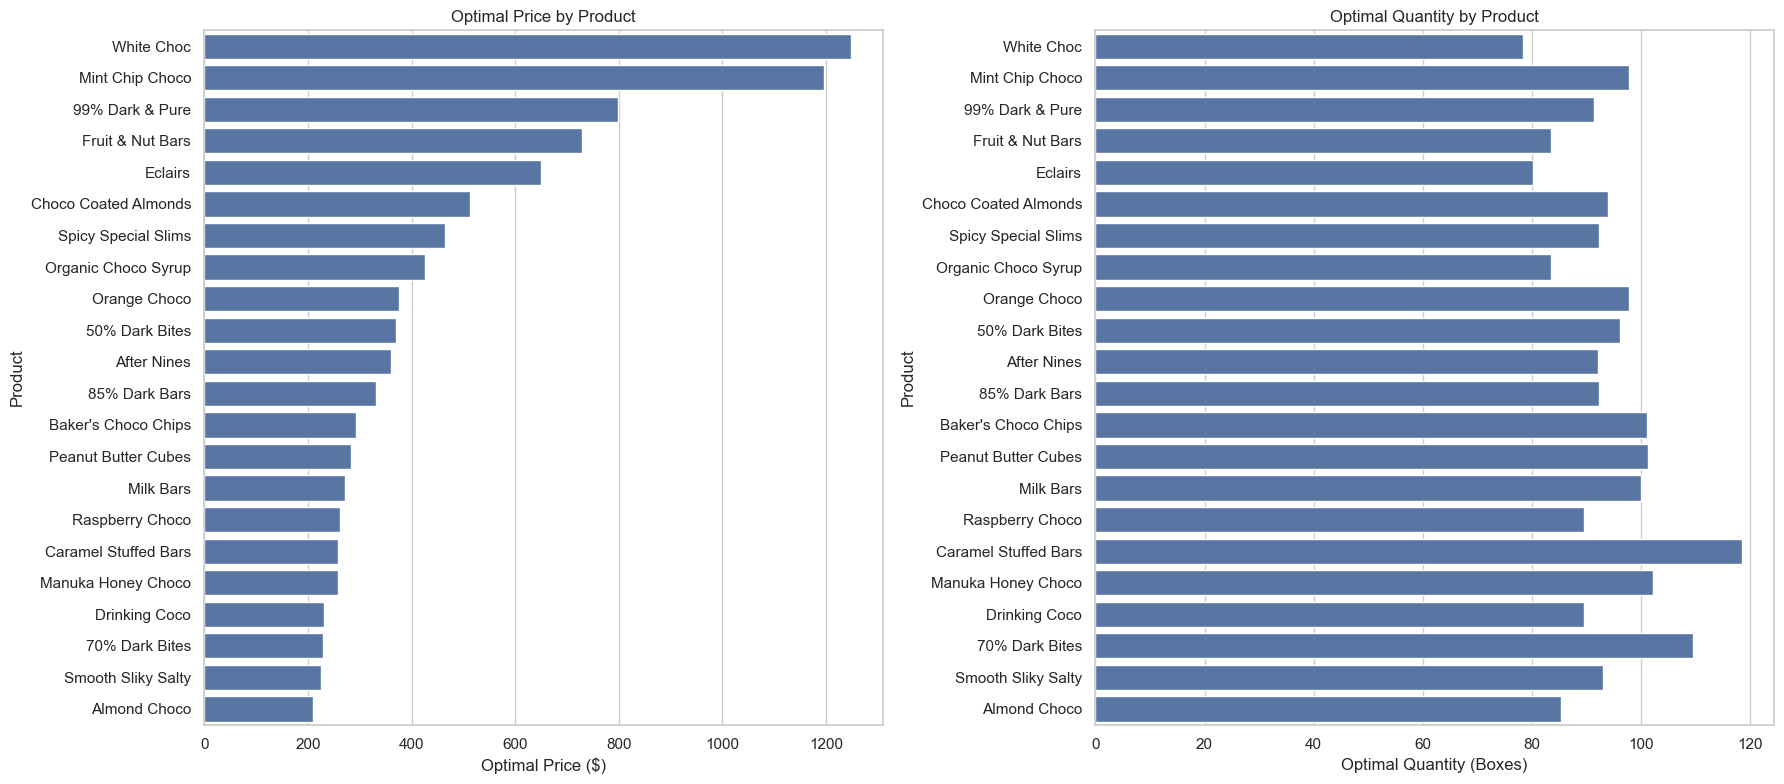

In [31]:
# Visualizing the results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Optimal Price
sns.barplot(ax=axes[0], y='Product', x='Optimal Price (P*)', data=demand_df.sort_values('Optimal Price (P*)', ascending=False))
axes[0].set_title('Optimal Price by Product')
axes[0].set_xlabel('Optimal Price ($)')

# Optimal Quantity
sns.barplot(ax=axes[1], y='Product', x='Optimal Quantity (Q*)', data=demand_df.sort_values('Optimal Price (P*)', ascending=False))
axes[1].set_title('Optimal Quantity by Product')
axes[1].set_xlabel('Optimal Quantity (Boxes)')

plt.tight_layout()
plt.show()